In [2]:
!pip install kaggle

import os
import zipfile

# Set your Kaggle API credentials (API key)
os.environ['KAGGLE_USERNAME'] = 'your kaggle API username'
os.environ['KAGGLE_KEY'] = 'YOUR KAGGLE API KEY'

# Specify the dataset details
dataset_slug = "smriti21/amazonreviews"
dataset_path = "/content/amazon_product_reviews"  # Update with the desired path to save the dataset

# Create the directory to save the dataset
if not os.path.exists(dataset_path):
    os.makedirs(dataset_path)

# Download the dataset using Kaggle API
!kaggle datasets download -d {dataset_slug} -p {dataset_path} --unzip

print("Dataset downloaded at:", dataset_path)


  0% 0.00/2.94M [00:00<?, ?B/s]
100% 2.94M/2.94M [00:00<00:00, 78.8MB/s]
Dataset downloaded at: /content/amazon_product_reviews


In [3]:
import os

# Specify the dataset path
dataset_path = "/content/amazon_product_reviews"

# List the files and directories within the dataset path
files = os.listdir(dataset_path)
for file in files:
    print(file)


Toys_and_Games
Cell_Phones_and_Accessories
part.json
Clothing_Shoes_and_Jewelry
Electronics
Sports_and_Outdoors
pdata.csv
separate.json
.ipynb_checkpoints
Home_and_Kitchen


In [4]:
import os
import zipfile

# Set your Kaggle API credentials (API key)
os.environ['KAGGLE_USERNAME'] = 'YOUR KAGGLE API USERNAME'
os.environ['KAGGLE_KEY'] = 'YOUR KAGGLE API KEY'

# Specify the dataset details
dataset_slug = "smriti21/amazonreviews"
dataset_path = "/content/amazon_product_reviews"  # Update with the desired path to save the dataset

# Create the directory to save the dataset
if not os.path.exists(dataset_path):
    os.makedirs(dataset_path)

# Download the dataset using Kaggle API
!kaggle datasets download -d {dataset_slug} -p {dataset_path} --unzip

print("Dataset downloaded at:", dataset_path)


  0% 0.00/2.94M [00:00<?, ?B/s]
100% 2.94M/2.94M [00:00<00:00, 195MB/s]
Dataset downloaded at: /content/amazon_product_reviews


In [5]:
import os
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Specify the dataset path
dataset_path = "/content/amazon_product_reviews"

In [6]:
import os
import pandas as pd
import string
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Specify the dataset path
dataset_path = "/content/amazon_product_reviews/separate.json"

# Load the dataset
dataset_file = os.path.join(dataset_path, "/content/amazon_product_reviews/separate.json/pdata.csv")
df = pd.read_csv(dataset_file)

# Preprocess the data
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Tokenize the text
    tokens = word_tokenize(text)

    # Remove stopwords and lowercase tokens
    tokens = [token.lower() for token in tokens if token.lower() not in stop_words]

    # Lemmatize tokens
    tokens = [lemmatizer.lemmatize(token) for token in tokens]

    # Join tokens back into a single string
    preprocessed_text = ' '.join(tokens)

    return preprocessed_text




[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [7]:


df['preprocessed_text'] = df['REVIEW_TEXT'].apply(preprocess_text)

# Drop rows with missing values
df.dropna(subset=['NOT VERIFIED'], inplace=True)

# Split the dataset into training and testing sets
X = df['preprocessed_text']
y = df['NOT VERIFIED']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize the preprocessed text data
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train_vec, y_train)

# Evaluate the model
accuracy = model.score(X_test_vec, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.9716693562847409


In [8]:
!pip install pycaret


In [9]:
from pycaret.classification import *


In [10]:
df['preprocessed_text'] = df['REVIEW_TEXT'].apply(preprocess_text)

# Drop rows with missing values
df.dropna(subset=['NOT VERIFIED'], inplace=True)



,Description,Value
0,Session id,753
1,Target,NOT VERIFIED
2,Target type,Binary
3,Original data shape,"(27881, 12)"
4,Transformed data shape,"(27881, 12)"
5,Transformed train set shape,"(19516, 12)"
6,Transformed test set shape,"(8365, 12)"
7,Numeric features,3
8,Categorical features,8
9,Preprocess,True


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,3.5710
nb,Naive Bayes,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,2.3060
dt,Decision Tree Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,2.1760
ridge,Ridge Classifier,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.9540
ada,Ada Boost Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.9220
gbc,Gradient Boosting Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,2.9590
et,Extra Trees Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,2.5640
xgboost,Extreme Gradient Boosting,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,2.4290
lightgbm,Light Gradient Boosting Machine,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,2.3500
rf,Random Forest Classifier,0.9999,1.0000,1.0000,0.9982,0.9991,0.9991,0.9991,2.8940


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

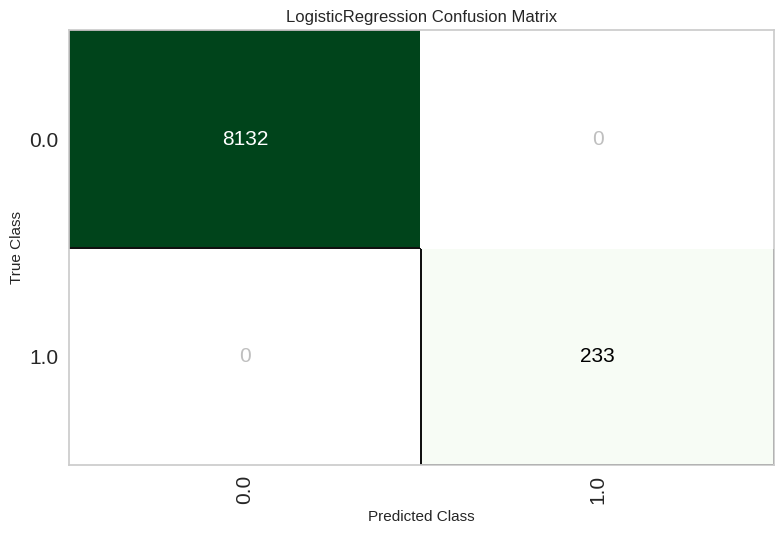

In [11]:
# Initialize PyCaret experiment
exp = setup(data=df, target='NOT VERIFIED')

# Compare models
best_model = compare_models()

# Generate confusion matrix
plot_model(best_model, plot='confusion_matrix')

In [13]:
# Drop rows with missing values
df.dropna(subset=['NOT VERIFIED'], inplace=True)

# Train a logistic regression model
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['preprocessed_text'])
y = df['NOT VERIFIED']
model = LogisticRegression()
model.fit(X, y)

# Recommendation function
def recommend(review):
    preprocessed_review = preprocess_text(review)
    vec = vectorizer.transform([preprocessed_review])
    prediction = model.predict(vec)
    if prediction[0] == 1:
        return "This review is likely to be trustworthy."
    else:
        return "This review is potentially spam."

# Example usage
review = "I like it very much!"
recommendation = recommend(review)
print(recommendation)


This review is potentially spam.
